# 08/05

$y = f(x)$  
$y$ is outcome/dependent variable  
$x$ is predictor/independent variable

**Machine Learning**
- Supervised Learning / Predictive Model ($\hat{y}$)
    - we try to find $y$'s relationship to $x$
    - Classification ($y$ is categorical)
    - Regression ($y$ is continuous)
- Unsupervised Learning (only independent variable, $x$)
    - there is no $y$, we only have $x$
    - Clustering
    - Association
- Ensemble Learning
    - related to supervised learning
    - helps improve prediction models using techniques like Bagging, Boosting

- Math
    - deterministic; measures for entire population
- Statistics
    - Descriptive (measures for a random sample from population)
    - Inferential (using sample, infer for population)


$N$ &rarr; size of population  
$\mu$ &rarr; true mean(unknown)  
$n$ &rarr; size of sample  
$\bar{x}, \bar{y}$ &rarr; sample mean  

**Standard Deviation** (average difference of samples from mean)  
population sd, $\sigma = \sqrt{\frac{\sum{(x_i - \bar{x})^2}} {N}}$  
sample sd, $s = \sqrt{\frac{\sum{(x_i - \bar{x})^2}} {n-1}}$ (provided $n \ge 30$ random samples)  
$s$ approaches $\sigma$


$n-1$ &rarr; degrees of freedom

In [1]:
import numpy as np

In [2]:
a = np.array([23,25,30,28,36])

In [3]:
np.mean(a)

28.4

In [4]:
np.var(a)

20.24

In [5]:
np.sum((a-np.mean(a))**2)/a.size

20.24

In [6]:
np.sum((a-np.mean(a))**2)/(a.size-1)

25.299999999999997

Built-in function np.var, np.std calculate with n instead of (n-1).  
It uses ddof=0 as default (ddof = delta degrees of freedom)  
To calculate with (n-1), set ddof=1.  
(ddof = Delta Degress of Freedom)

In [7]:
np.var(a,ddof=1)

25.299999999999997

In [8]:
np.std(a)

4.498888751680797

In [9]:
np.std(a,ddof=1)

5.029910535983716

In [10]:
np.sqrt(np.sum((a-np.mean(a))**2)/a.size)

4.498888751680797

In [11]:
np.sqrt(np.sum((a-np.mean(a))**2)/(a.size-1))

5.029910535983716

## Probability Distributions

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import scipy.stats as stats

### Binomial Distribution

- event has only two outcomes - success or failure


$P(x) = {}^nC_x p^x q^{n-x}$

- Apriori prob/classical prob (well-known, accepted values)
- Emperical prob (based on historical/company data)
- Subjective prob

k = all possible outcomes  
n = no of random samples  
p = prob of success  

In [2]:
k=np.arange(0,25)
n=15
p=0.2

In [3]:
binom = stats.binom.pmf(k, n, p)

In [4]:
binom

array([3.51843721e-02, 1.31941395e-01, 2.30897442e-01, 2.50138895e-01,
       1.87604171e-01, 1.03182294e-01, 4.29926226e-02, 1.38190573e-02,
       3.45476432e-03, 6.71759729e-04, 1.00763959e-04, 1.14504499e-05,
       9.54204160e-07, 5.50502400e-08, 1.96608000e-09, 3.27680000e-11,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [5]:
k

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

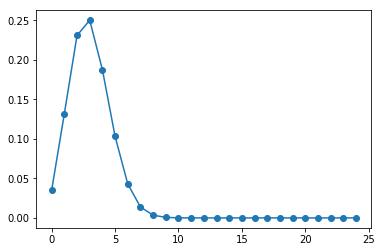

In [16]:
plt.plot(k,binom,'o-')
plt.show()

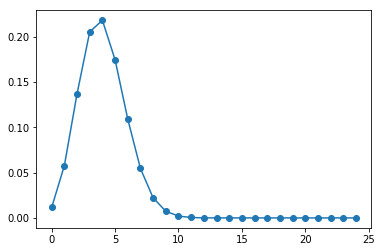

In [17]:
binom = stats.binom.pmf(k, 20, 0.2)
plt.plot(k,binom,'o-')
plt.show()

In [18]:
k = np.arange(0,12)
n = 10 # sample of 10 LED bulbs
p = 0.05 # prob of LED bulb being defective
binom = stats.binom.pmf(k,n,p)
binom

array([5.98736939e-01, 3.15124705e-01, 7.46347985e-02, 1.04750594e-02,
       9.64808106e-04, 6.09352488e-05, 2.67259863e-06, 8.03789063e-08,
       1.58642578e-09, 1.85546875e-11, 9.76562500e-14, 0.00000000e+00])

(a) prob that none of the LED bulbs are defective?

In [19]:
binom[0]

0.5987369392383789

(b) prob that exactly one LED bulb is defective?

In [20]:
binom[1]

0.31512470486230504

(c) prob that two or fewer LED bulbs are defective?

In [21]:
cumbinom = stats.binom.cdf(k,n,p)
cumbinom

array([0.59873694, 0.91386164, 0.98849644, 0.9989715 , 0.99993631,
       0.99999725, 0.99999992, 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [22]:
cumbinom[2]

0.9884964426207031

(c) prob that three or more LED bulbs are defective?

In [23]:
1 - cumbinom[3]

0.0010284979378906156

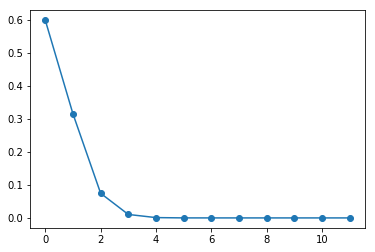

In [24]:
plt.plot(k,binom,'o-')
plt.show()

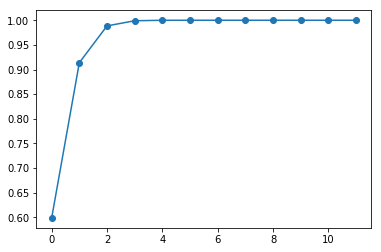

In [25]:
plt.plot(k,cumbinom,'o-')
plt.show()

### Poisson Distribution

$P(x) = \frac{e^{-\lambda} \lambda^x} {x!}$

In [26]:
rate = 2.5 # mean injuries per month
n = np.arange(0,20)
poisson = stats.poisson.pmf(n,rate)

In [27]:
poisson

array([8.20849986e-02, 2.05212497e-01, 2.56515621e-01, 2.13763017e-01,
       1.33601886e-01, 6.68009429e-02, 2.78337262e-02, 9.94061650e-03,
       3.10644266e-03, 8.62900738e-04, 2.15725184e-04, 4.90284510e-05,
       1.02142606e-05, 1.96428089e-06, 3.50764445e-07, 5.84607408e-08,
       9.13449075e-09, 1.34330746e-09, 1.86570481e-10, 2.45487475e-11])

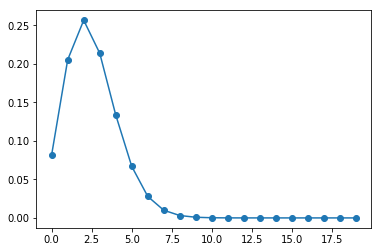

In [28]:
plt.plot(n,poisson,'o-')
plt.show()

In [29]:
# prob that no work-related injuries?
poisson[0]

0.0820849986238988

In [30]:
# prob that atleast 1 injury occurs?
1-poisson[0]

0.9179150013761012

In [31]:
rate = 6 # avg customers at at a time in bank
poisson = stats.poisson.pmf(np.arange(0,20),rate)

In [32]:
# prob that 4 customers are at bank
poisson[4]

0.13385261753998332

In [33]:
# prob that 6 customers are at bank
poisson[6]

0.1606231410479801

In [34]:
# prob that 10 customers are at bank
poisson[10]

0.04130309341233764

### Normal Distribution

In [35]:
mu = 68 # minutes per day sending messages on smartphone
sigma = 12

In [36]:
# proportion of customers spending more than 90 minutes
z = (90 - mu) / sigma
1 - stats.norm.cdf(z)

0.03337650758481725

In [37]:
# proportion of customers spending less than 20 minutes
z = (20 - mu)/sigma
stats.norm.cdf(z)

3.167124183311986e-05

In [38]:
# what proportion spending between 50 minutes and 100 minutes
z50 = (50 - mu)/sigma
z100 = (100 - mu)/sigma
stats.norm.cdf(z100) - stats.norm.cdf(z50)

0.9293624181635521

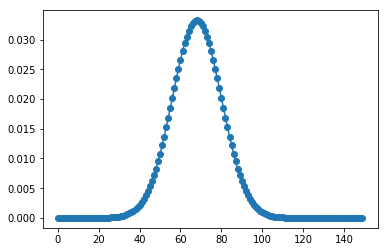

In [39]:
x = np.arange(0,150)
norm = stats.norm.pdf(x,mu,sigma)
plt.plot(x, norm, 'o-')
plt.show()

In [40]:
mu = 0.295 # kgs is mean weight of cereal pack
sigma = 0.025

In [41]:
# probability of weight less than 0.28 kg
z = (0.28 - mu)/sigma
stats.norm.cdf(z)

0.2742531177500741

In [42]:
# probability of weight more than 0.35 kg
z = (0.35 - mu)/sigma
1 - stats.norm.cdf(z)

0.01390344751349859

In [43]:
# probability of weight bwteen 0.26 and 0.34 kg
z1 = (0.26 - mu)/sigma
z2 = (0.34 - mu)/sigma
stats.norm.cdf(z2) - stats.norm.cdf(z1)

0.8833130216533032

## Confidence Intervals

In [44]:
Xavg = 4.5
sigma = 1.2
n = 100

In [45]:
ci = 0.95
s = sigma / np.sqrt(n)
LCI, UCI = stats.norm.interval(ci, loc=Xavg, scale=s)
print('95%s CI for population mean is %1.4f to %1.4f' % ('%', LCI, UCI))

95% CI for population mean is 4.2648 to 4.7352


In [95]:
# prob that population mean is > 4.73 days
z = (4.7352 - Xavg) / s
1 - stats.norm.cdf(z)

0.024997895148220484

In [96]:
z = (4.2648 - Xavg) / s
stats.norm.cdf(z)

0.02499789514822049

In [99]:
n = 100
Xavg = 170 # mm is the av length of sample pencils
sigma = 0.02 

In [101]:
ci = 0.95
s = sigma / np.sqrt(n)
LCI, UCI = stats.norm.interval(ci, loc=Xavg, scale=s)
print('95%s CI for population mean is %1.4f to %1.4f' % ('%', LCI, UCI))

95% CI for population mean is 169.9961 to 170.0039
